# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import os
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [117]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [118]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = dt.datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | yulinshi
Processing Record 3 of Set 1 | rio verde
Processing Record 4 of Set 1 | grootfontein
Processing Record 5 of Set 1 | visakhapatnam
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | pevely
Processing Record 9 of Set 1 | lazaro cardenas
Processing Record 10 of Set 1 | ploneour-lanvern
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kodok
City not found. Skipping...
Processing Record 16 of Set 1 | tadine
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | likiep
Processing Record 21 of Set 1 | port-aux-francai

Processing Record 40 of Set 4 | gazojak
Processing Record 41 of Set 4 | bodo
Processing Record 42 of Set 4 | minas de marcona
Processing Record 43 of Set 4 | ascension
Processing Record 44 of Set 4 | mukdahan
Processing Record 45 of Set 4 | piton saint-leu
Processing Record 46 of Set 4 | salur
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | porto-vecchio
Processing Record 49 of Set 4 | kirakira
Processing Record 0 of Set 5 | saipan
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | newman
Processing Record 3 of Set 5 | tsiombe
Processing Record 4 of Set 5 | beloyarskiy
Processing Record 5 of Set 5 | atafu village
Processing Record 6 of Set 5 | qamdo
Processing Record 7 of Set 5 | utrik
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | hualien city
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | kropachevo
Processing Record 12 of Set 5 | fernie
Processing Record 13 of Set 5 | boulder city
Proc

Processing Record 33 of Set 8 | tenenkou
Processing Record 34 of Set 8 | keflavik
Processing Record 35 of Set 8 | sarankhola
Processing Record 36 of Set 8 | amurzet
Processing Record 37 of Set 8 | travnik
Processing Record 38 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 39 of Set 8 | timon
Processing Record 40 of Set 8 | brigantine
Processing Record 41 of Set 8 | noshiro
Processing Record 42 of Set 8 | churachandpur
Processing Record 43 of Set 8 | mwaro
Processing Record 44 of Set 8 | borogontsy
Processing Record 45 of Set 8 | yicheng
Processing Record 46 of Set 8 | dongcun
Processing Record 47 of Set 8 | tchibanga
Processing Record 48 of Set 8 | haiku-pauwela
Processing Record 49 of Set 8 | casper
Processing Record 0 of Set 9 | cururupu
Processing Record 1 of Set 9 | hihifo
City not found. Skipping...
Processing Record 2 of Set 9 | kavaratti
Processing Record 3 of Set 9 | illela
Processing Record 4 of Set 9 | munchenbuchsee
Processing Record 5 of S

Processing Record 23 of Set 12 | kayyerkan
Processing Record 24 of Set 12 | suez
Processing Record 25 of Set 12 | brisas de zicatela
Processing Record 26 of Set 12 | joao pinheiro
Processing Record 27 of Set 12 | balabac
Processing Record 28 of Set 12 | sumbawa besar
Processing Record 29 of Set 12 | sao miguel do araguaia
Processing Record 30 of Set 12 | northam
Processing Record 31 of Set 12 | xunchang
Processing Record 32 of Set 12 | cayeli
Processing Record 33 of Set 12 | axim
Processing Record 34 of Set 12 | malir cantonment
City not found. Skipping...
Processing Record 35 of Set 12 | manggar
Processing Record 36 of Set 12 | charters towers
Processing Record 37 of Set 12 | mata-utu
Processing Record 38 of Set 12 | xinglongshan
Processing Record 39 of Set 12 | el kseur
Processing Record 40 of Set 12 | menongue
Processing Record 41 of Set 12 | xucheng
Processing Record 42 of Set 12 | touros
Processing Record 43 of Set 12 | peace river
Processing Record 44 of Set 12 | lembar
City not 

In [119]:
len(city_data)

594

In [121]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [122]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,2.90,87,100,5.08,SJ,2023-10-22 21:31:32
1,yulinshi,38.2906,109.7494,11.32,45,95,2.29,CN,2023-10-22 21:31:09
2,rio verde,21.9333,-99.9833,29.83,42,85,6.21,MX,2023-10-22 21:31:33
3,grootfontein,-19.5667,18.1167,24.76,11,0,2.06,NA,2023-10-22 21:31:33
4,visakhapatnam,17.6900,83.2093,25.94,53,40,3.60,IN,2023-10-22 21:31:33


In [123]:
# Export the City_Data into a csv

output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
csv_file_path = os.path.join(output_directory, "cities.csv")
city_data_df.to_csv(csv_file_path, index_label="City_ID")

# Check if the file has been successfully saved
if os.path.exists(csv_file_path):
    print(f"CSV file saved to: {csv_file_path}")
else:
    print("Failed to save the CSV file.")

CSV file saved to: output_data/cities.csv


In [126]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.90,87,100,5.08,SJ,2023-10-22 21:31:32
1,yulinshi,38.2906,109.7494,11.32,45,95,2.29,CN,2023-10-22 21:31:09
2,rio verde,21.9333,-99.9833,29.83,42,85,6.21,MX,2023-10-22 21:31:33
3,grootfontein,-19.5667,18.1167,24.76,11,0,2.06,NaN,2023-10-22 21:31:33
4,visakhapatnam,17.6900,83.2093,25.94,53,40,3.60,IN,2023-10-22 21:31:33


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

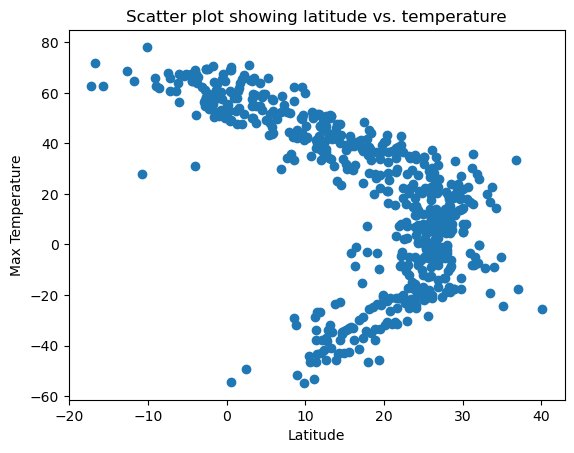

In [127]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Scatter plot showing latitude vs. temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

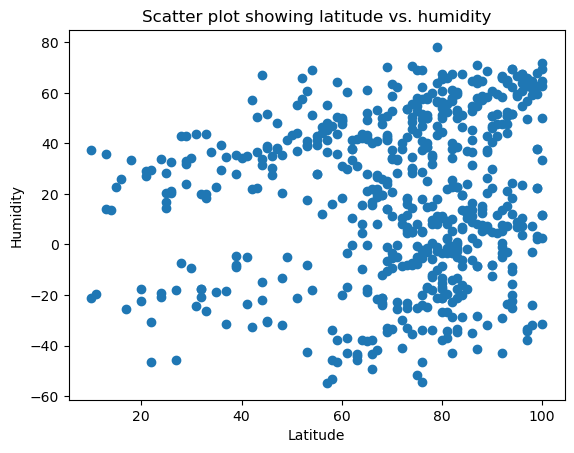

In [128]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Scatter plot showing latitude vs. humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

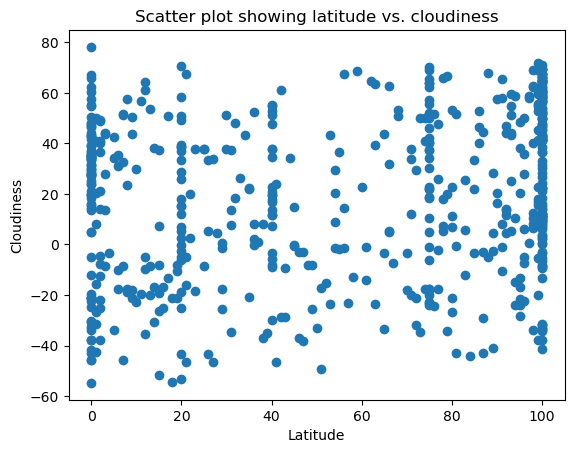

In [129]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Scatter plot showing latitude vs. cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

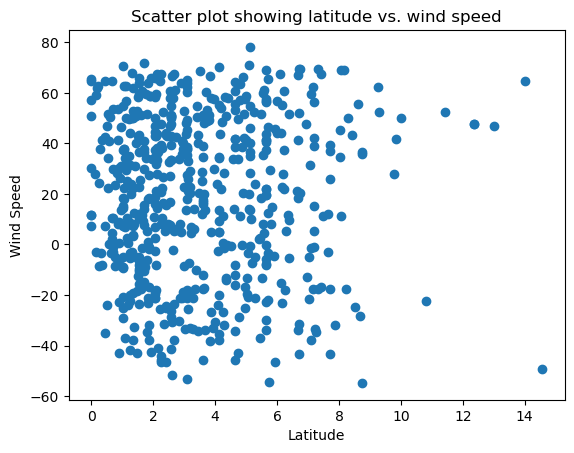

In [130]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Scatter plot showing latitude vs. wind speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [131]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = print(f"y ={slope: .2f}x +{intercept: .2f}")
    plt.plot(x, regress_values, "r-")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.90,87,100,5.08,SJ,2023-10-22 21:31:32
1,yulinshi,38.2906,109.7494,11.32,45,95,2.29,CN,2023-10-22 21:31:09
2,rio verde,21.9333,-99.9833,29.83,42,85,6.21,MX,2023-10-22 21:31:33
4,visakhapatnam,17.6900,83.2093,25.94,53,40,3.60,IN,2023-10-22 21:31:33
7,pevely,38.2834,-90.3951,21.50,47,14,2.12,US,2023-10-22 21:31:33


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grootfontein,-19.5667,18.1167,24.76,11,0,2.06,NaN,2023-10-22 21:31:33
5,rio grande,-32.0350,-52.0986,20.06,98,100,7.87,BR,2023-10-22 21:30:31
6,grytviken,-54.2811,-36.5092,0.52,76,18,5.74,GS,2023-10-22 21:31:33
12,port mathurin,-19.6833,63.4167,24.32,81,11,5.03,MU,2023-10-22 21:31:34
14,tadine,-21.5500,167.8833,23.41,67,95,7.02,NC,2023-10-22 21:31:35


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8753246968268495
y =-0.53x + 33.91


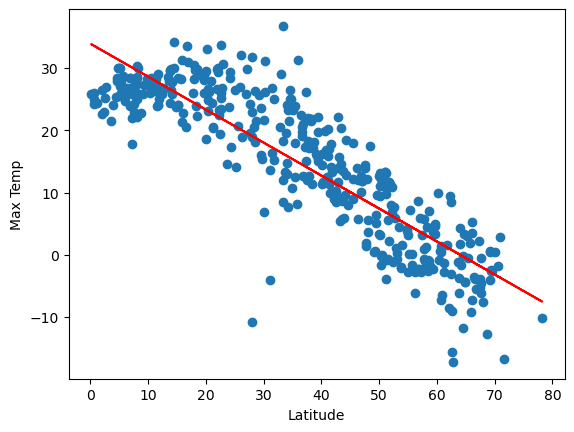

In [134]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (0, 40))

The r-value is: 0.7335607272539325
y = 0.35x + 29.08


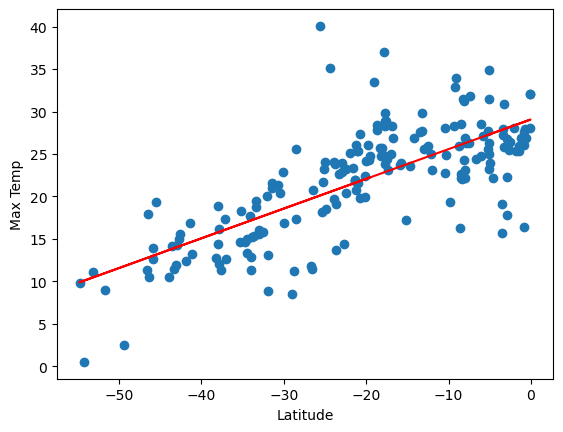

In [135]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-25, 40))

There is a relativley stong negative correlation between temperature and latitude in the Northen Hemisphere with a correlation co-efficient of -0.873. 
Alternatively there is a fairly positive correlation between temperature and latitude in the Southern Hemisphere with a correlation co-efficient of 0.726. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09524210294783765
y = 0.10x + 68.91


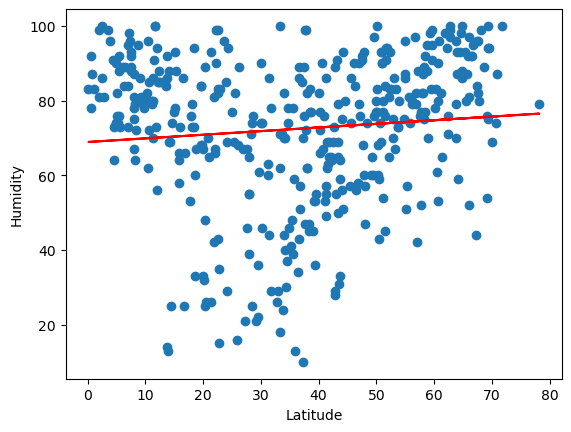

In [136]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (45, 15))

The r-value is: 0.12224382893577695
y = 0.18x + 72.57


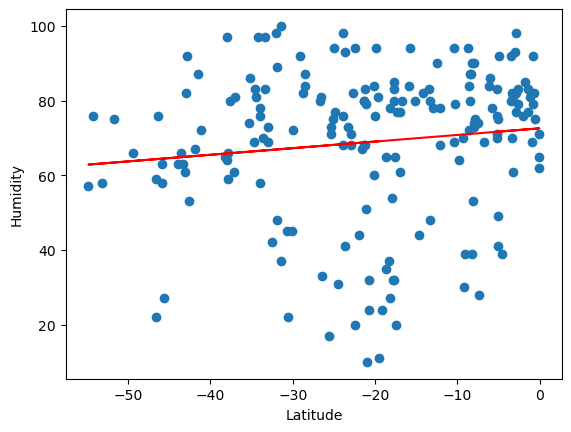

In [137]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-55, 35))

The linear regression graph that has been generated for the Northern hemisphere for Humidity shows very slight positive correlation. ALthough looking at the Southern hemisphere graph, it shows a flatter output, suggesting less correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09761776124448487
y = 0.20x + 53.05


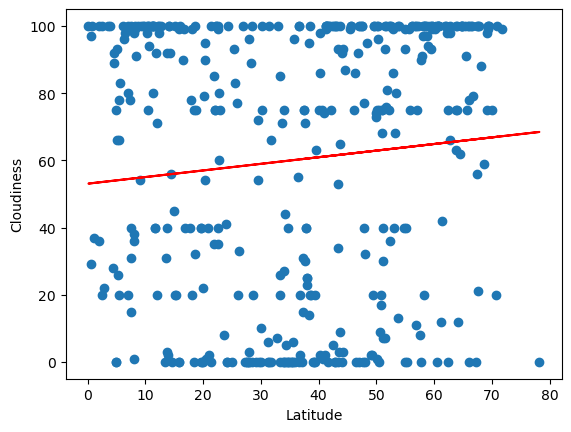

In [138]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (0, 25))

The r-value is: 0.14012451209334223
y = 0.36x + 53.81


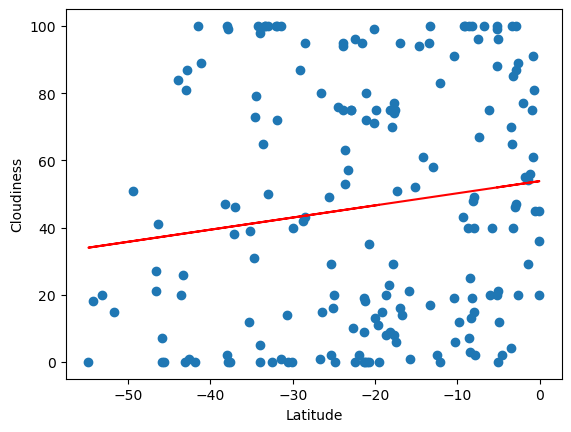

In [139]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-55, 60))

The scatter plots highlighting cloudiness for the northern and southern hemisphere demonstrate no correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1492206209151445
y = 0.02x + 2.78


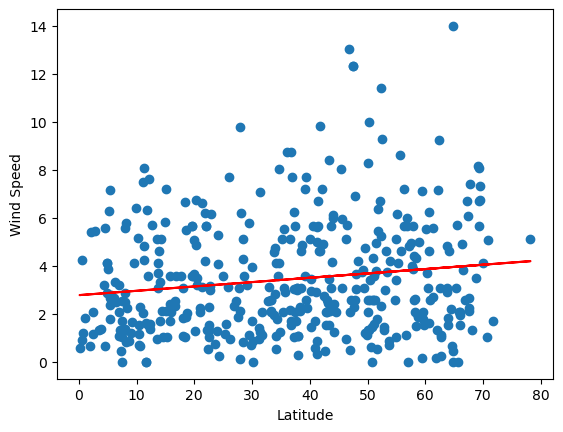

In [140]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (35, 25))

The r-value is: -0.1628633060530912
y =-0.03x + 2.99


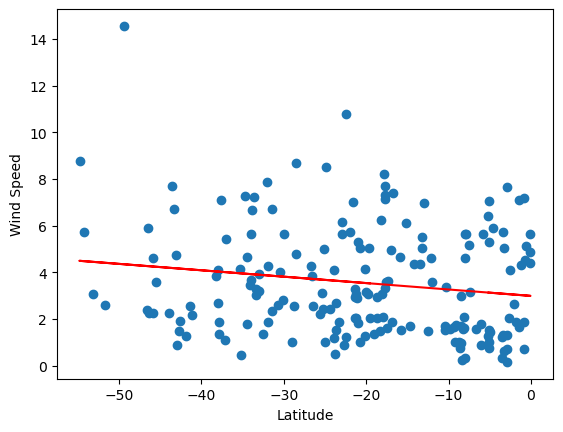

In [142]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 25))

The scatter plots above that map the relation between random cities in the Northern and Southern hemispheres' wind speed against latitude show that there is very little to no correlation between the two variables. 